pygame 2.1.2 (SDL 2.0.18, Python 3.9.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


/var/folders/kt/4lhm28mn11xd8x0s3sdb4l780000gn/T/ipykernel_5156/3181629527.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'player_number': player_number, 'duration': duration, 'Points': Points, 'date_time': now}, ignore_index=True)


xpos: 16
ypos: 2
x0: 10
y0: 200
Avatar x coordinate: 490
Avatar y coordinate: 260
Game play time in secs 14.111564874649048


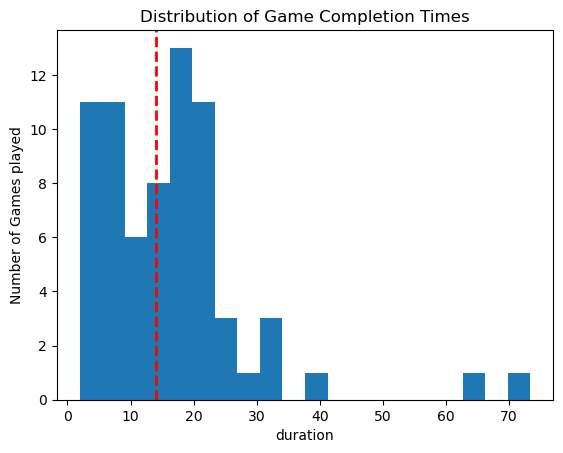

Histogram of game completion time
Most Recent Game play Highlighted in Red dashed line


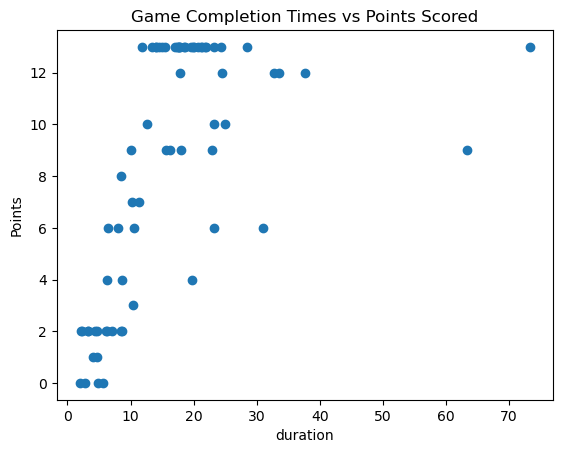

scatterplot of game completion times vs points scored


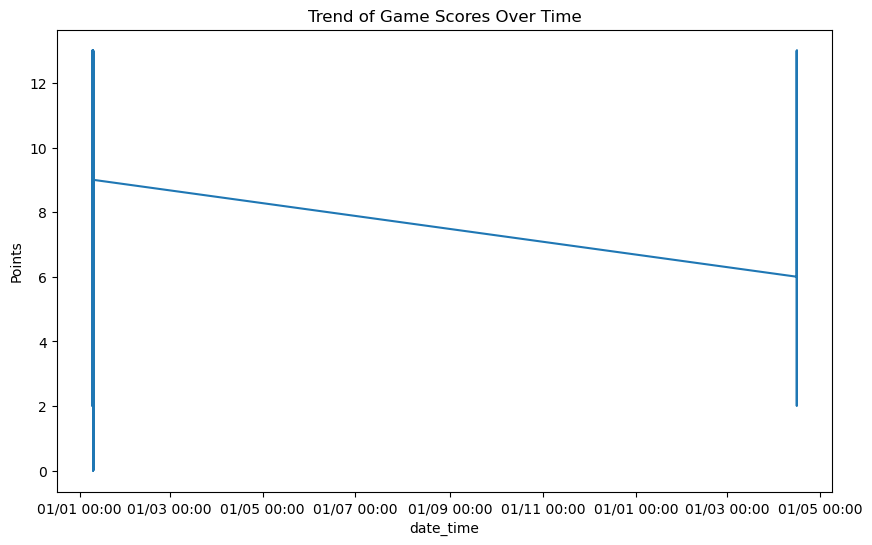

Trendline for game scores over time


In [1]:
## the following line is just MAGIC ##############################################
## we need it to be able to draw images on the screen ############################

from medialib import *

initialize() # always the first instruction of the program
##################################################################################

##  each item of the list representing the background of each row
background=[['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X'],
            ['X','_','F','F','_','_','M','_','_','F','F','_','F','_','_','_','_','X'],
            ['X','F','_','_','M','_','M','F','_','_','F','_','_','M','_','M','F','X'],
            ['X','_','_','F','_','_','_','_','_','F','M','_','F','_','F','_','E','X'],
            ['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X']] 


collidables = 'X'
monsters='M'
food='F'

x0=10
y0=200

def draw_row(row, x_pos, y_pos, min_y, max_y, block_size):
        for i in range(len(row)):
            x = x_pos + i*block_size
            y = y_pos
            if row[i] in collidables:
                draw("X.png", x, y)
            elif row[i] in monsters:
                draw("M.png", x, y)
            elif row[i] == 'F':
                draw("F.png", x, y)
            elif row[i] == 'E':
                draw("E.png", x, y)
            else:
                draw("_.png", x, y)                

text('Maze game',200,100,20)
text('You are a lost cat, and have to find your way back home...',20,400,12)
text('reach the door to leave this level and get closer to home!',20,450,12)
text('To play: press a and d keys to move left and right',20,500,12)
text('         press w and s keys to move upwards and downwards',20,550,12)
text('         press q to quit the game',20,600,12)                

xpos=1
ypos=1

game_running = True
Points=0

import time
import datetime
import pandas as pd
import numpy as np
from openpyxl import load_workbook

df = pd.read_csv("hcvdat0.csv")

start_time = time.time()

while game_running:
    clear(100,100,100)
    
    np.random.seed(40)
    random_rows = df.sample(5)
    x_coords = random_rows["ALB"] * 0.1
    y_coords = random_rows["ALT"] * 0.2
    min_x = df["ALB"].min()
    max_x = df["ALB"].max()
    scaled_x_coords = (x_coords - min_x) / (max_x - min_x)
    
    random_food_rows = df.sample(11)
    x_food_coords = random_food_rows["CHE"] * 0.1
    y_food_coords = random_food_rows["CHOL"] * 0.2
    min_x_food = df["CHE"].min()
    max_x_food = df["CHE"].max()
    scaled_x_food_coords = (x_food_coords - min_x_food) / (max_x_food - min_x_food)
    
    if background[ypos][xpos] == 'F':
        background[ypos][xpos] = '_'
        Points += 1
    
    text("Points: {}".format(Points), 10, 10, 16)
            
    for i in range(len(background)):
        x_pos = x0
        y_pos = y0 + i*30
        draw_row(background[i],x_pos,y_pos,y0,y0+30,30)
        draw("C.png" ,xpos*30+x0, ypos*30+y0)
    
    userinput = wait_key_press()
    
    if userinput == "q":
        clear()
        text("Game over!!!", 10,500,16)
        exit()
        game_running = False
        
    if background[ypos][xpos] in monsters:
        text("You lost!!!", 10,500,16)
        exit()
        game_running = False
        
    if userinput == "a":
        clear()
        if xpos<=1 or background[ypos][xpos-1] == 'E':
            if background[ypos][xpos-1] == 'E':
                draw("you_win.png", 100, 50)
                exit()
                game_running = False
            else:
                text("already at the most left most side, cannot go left anymore", 100,500,16)
            draw("C.png" ,xpos*30+x0, ypos*30+y0)    
        else:
            xpos = xpos-1
            if background[ypos][xpos] in monsters:
                text("You lost!!!", 10,500,16)
                exit()
                game_running = False
            else:
                text("moving left by 30", 10,500,16)
                draw("C.png" ,xpos*30+x0, ypos*30+y0)
            
    elif userinput == "d":
        clear()
        if xpos>=16 or background[ypos][xpos+1] == 'E':
            if background[ypos][xpos+1] == 'E':
                draw("you_win.png", 100, 50)
                exit()
                game_running = False
            else:
                text("already at the most right most side, cannot go right anymore", 100,500,16)
            draw("C.png" ,xpos*30+x0, ypos*30+y0)
        else:
            xpos = xpos+1
            if background[ypos][xpos] in monsters:
                text("You lost!!!", 10,500,16)
                exit()
                game_running = False
            else:
                text("moving right by 30", 100,500,16)
                draw("C.png" ,xpos*30+x0, ypos*30+y0)
            
    elif userinput == "s":
        clear()
        if ypos>=3 or background[ypos+1][xpos] == 'E':
            if background[ypos+1][xpos] == 'E':
                draw("you_win.png", 100, 50)
                exit()
                game_running = False
            else:
                text("already at the downer most side, cannot down anymore", 100,500,16)
            draw("C.png" ,xpos*30+x0, ypos*30+y0)
        else:
            ypos = ypos+1
            if background[ypos][xpos] in monsters:
                text("You lost!!!", 10,500,16)
                exit()
                game_running = False
            else:
                text("moving down by 30", 100,500,16)
                draw("C.png" ,xpos*30+x0, ypos*30+y0)
                            
    elif userinput == "w":
        clear()
        if ypos<=1 or background[ypos-1][xpos] == 'E':
            if background[ypos-1][xpos] == 'E':
                draw("you_win.png", 100, 50)
                exit()
                game_running = False
            else:
                text("already at the upper most side, cannot up anymore", 100,500,16)
            draw("C.png" ,xpos*30+x0, ypos*30+y0)
        else:
            ypos = ypos-1
            if background[ypos][xpos] in monsters:
                text("You lost!!!", 10,500,16)
                exit()
                game_running = False
            else:
                text("moving up by 30", 100,500,16)
                draw("C.png" ,xpos*30+x0, ypos*30+y0)
            
    elif userinput not in ["a", "s", "w", "d"]:
        clear()
        text("Illegal Input!!!", 10,500,16)
                        
all_done()

df = pd.DataFrame(columns=['player_number', 'duration', 'Points', 'date/time'])

end_time = time.time()  
duration = end_time - start_time 

now = datetime.datetime.now()

df = pd.read_excel('results.xlsx', sheet_name='Sheet1')

player_number = len(df) + 1

results_df = pd.read_excel('results.xlsx')

df = df.append({'player_number': player_number, 'duration': duration, 'Points': Points, 'date_time': now}, ignore_index=True)

df.to_excel('results.xlsx', index=False)

print("xpos:", xpos)
print("ypos:", ypos)
print("x0:", x0)
print("y0:", y0)
print("Avatar x coordinate:", xpos*30+x0)
print("Avatar y coordinate:", ypos*30+y0)
print("Game play time in secs", duration)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


## histogram of game completion times
plt.hist(df['duration'], bins=20)
plt.axvline(duration, color='r', linestyle='dashed', linewidth=2)  # highlight the most recent game time
plt.xlabel('duration')
plt.ylabel('Number of Games played')
plt.title('Distribution of Game Completion Times')
plt.show()

print("Histogram of game completion time")
print("Most Recent Game play Highlighted in Red dashed line")

## scatterplot of game completion times vs points scored
plt.scatter(df['duration'], df['Points'])
plt.xlabel('duration')
plt.ylabel('Points')
plt.title('Game Completion Times vs Points Scored')
plt.show()

print("scatterplot of game completion times vs points scored")

## trend line for game scores over time
plt.figure(figsize=(10,6))
plt.plot(df['date_time'], df['Points'])

plt.xlabel('date_time')
plt.ylabel('Points')
plt.title('Trend of Game Scores Over Time')
formatter = mdates.DateFormatter('%d/%m %H:%M')
plt.gca().xaxis.set_major_formatter(formatter)


plt.show()

print("Trendline for game scores over time")
